# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

Processing ./ait_sdk-0.1.5-py3-none-any.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached MarkupSafe-1.1.1-cp38-cp38-manylinux1_x86_64.whl (32 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached nbclient-0.5.1-py3-none-any.whl (65 kB)
  Using cached jupyter_client-6.1.7-py3-none-any.whl (108 kB)
  Using cached jupyter_core-4.7.0-py3-none-any.whl (82 kB)
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
  Using cached numpy-1.19.3-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Using cached pandocfilters-1.4.3-py3-none-any.whl
  Using cached psutil-5.7.3-cp38-cp38-linux_x86_64.whl
  Using cached py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached 

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('pandas')
    requirements_generator.add_package('seaborn')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.5-py3-none-any.whl
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from os import path

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('dev_template_remote_docker')
    manifest_genenerator.set_ait_description('AIT template (docker image regist to remote)')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Coverage_for_distinguished_problem_cases')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='iris_data', 
                                             type_='dataset', 
                                             description='アヤメの分類データです', 
                                             format_=['csv'], 
                                             schema='https://archive.ics.uci.edu/ml/datasets/iris')
    manifest_genenerator.add_ait_parameters(name='mean_column_name', 
                                            type_='str', 
                                            description='sepal.width\nsepal.length\npetal.width\npetal.length', 
                                            default_val='sepal.width')
    manifest_genenerator.add_ait_measures(name='mean', 
                                          type_='float', 
                                          description='mean of select column', 
                                          structure='single')
    manifest_genenerator.add_ait_resources(name='pairplot', 
                                           type_='picture', 
                                           description='pairplot')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='iris_data',
                                        value='iris_data/tableconvert_csv_4nryby.csv')
    input_generator.set_ait_params(name='mean_column_name',
                                   value='petal.width')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'mean')
def calc_mean(iris_data, col_name):
    return iris_data.mean()[col_name]

In [12]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'pairplot', 'pairplot.png')
def save_pair_plot(iris_data, file_path: str=None) -> str:    
    sn.pairplot(iris_data, hue='variety')
    plt.savefig(file_path)

In [13]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [14]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # インベントリを読み込み
    iris_data = pd.read_csv(ait_input.get_inventory_path('iris_data'))
    
    calc_mean(iris_data, ait_input.get_method_param_value('mean_column_name'))
    save_pair_plot(iris_data)
    move_log()

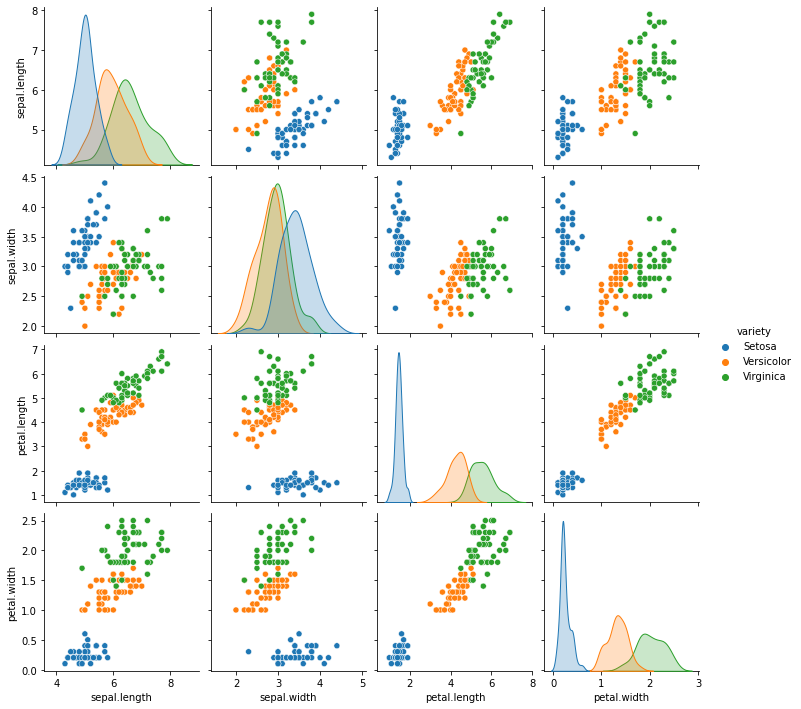

In [15]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [16]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [17]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
